# __C__reate __R__ead __U__pdate __D__elete com Python e MariaDB

Agora que já temos um certo conhecimento na linguagem Python e na linguagem SQL ANSI, vamos unir estas duas linguagens e construir um mini sistema para realizarmos um CRUD com o nosso banco de dados - __INFINITY__.

> _CRUD é um acrônimo para __C__reate, __R__ead, __U__pdate e __D__elete_

Antes de colocarmos as mãos no código, precisamos preparar no nosso ambiente de desenvolvimento.

## Checklist

1.   Verifique se você tem, em sua máquina, um servidor de Banco de Dados instalado (pode ser o MySQL ou o MariaDB - este é um _fork_ do MySQL)

2.   Confirme se o MySQL Workbench está instalado e configurado com a conexão ao servidor

3.   Vá para sua pasta de trabalho (onde você está escrevendo seus códigos em Python)

4.   Verifique se seu ambiente virtual do python está ativo. Caso não apareça, chame-o através do comando abaixo de acordo com seu sistema operacional:

      a. __Windows__ : `<nome do ambiente virtual>\Scripts\activate`

      b. __Distros Linux e Mac__ : source `<nome do ambiente virtual>/bin/activate`

5.   Agora abra o seu editor de código preferido. Caso seja o VS Code, digite o seguinte comando no CMD (prompt de comando) do Windows: `code .`

6.   Na próxima seção vamos ver as bibliotecas necessárias para este projeto

## Instalação das bibliotecas python

### MySQL Connector Python

Aprendemos as principais instruções SQL de 4 categorias: __DDL__, __DML__, __TCL__ e __DQL__. E as utilizamos diretamente num cliente SQL como o _MySQL Workbench_ e _Beekeeper Studio_.

Agora chegou a hora de executarmos estas instruções SQL diretamente em nosso código __python__.

Para isso, precisamos instalar via _pip_ a biblioteca que fará conexão com o banco de dados __MySQL__. 

```
pip install mysql-connector-python
```

Agora podemos abrir o nosso editor de código e realizar a conexão com o banco de dados:

```
import mysql.connector

try:
  conn = mysql.connector.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    passwd='aluno99',
    db='INFINITY'
  )
except Exception as err:
  raise err('Algo deu errado')
else:
  print(conn.is_connected())
finally:
  print('Nossa 1ª conexão ao Banco de Dados')
```

Repare que com o código acima conseguimos nos conectar ao Banco de Dados, porém, passamos a senha em _"texto plano"_ o que __definitivamente__ não é uma boa prática!

Então como podemos resolver esta questão?

__R__: Podemos solicitar que o usuário digite sua senha para conexão. Vamos usar a função `input()`.

```
import mysql.connector

try:
  conn = mysql.connector.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    passwd=input('Senha: '),
    db='INFINITY'
  )
except Exception as err:
  raise err('Algo deu errado')
else:
  print(conn.is_connected())
finally:
  print('Nossa 1ª conexão ao Banco de Dados')
```

A função `input()` gera _eco_ na saída padrão, ou seja, tudo que é digitado aparece.

Não podemos utilizar a função `input()`. E agora?

Para nossa sorte, o __Python__ disponibiliza o módulo __getpass__ que possui uma função de mesmo nome. 

Vamos ver na próxima seção como isso funciona.

### Get Pass

O _getpass_ é um módulo que já vem disponível no Python 3.x.

Caso seja necessário podemos solicitar que o usuário digite sua senha para que possamos conectar ao banco de dados. Desta forma, o nosso script irá solicitar através de um prompt a senha ao usuário.

> __ATENÇÃO__ : Não use a função `input` porque ela deixa visível os caracteres digitados!

Neste caso, é extremamente apropriado o uso do módulo `getpass` que ao contrário da função `input`, não deixa visível - não gera _eco_ - os caracteres digitados pelo usuário.

__Exemplo__

```
from getpass import getpass

passwd = getpass('Enter your password: ')

print(f'Typed password: {passwd}')
```

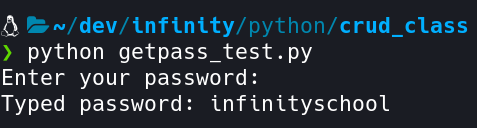

```
import mysql.connector
from getpass import getpass

try:
  conn = mysql.connector.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    passwd=getpass('Senha: '),
    db='INFINITY'
  )
except Exception as err:
  raise err('Algo deu errado')
else:
  print(conn.is_connected())
finally:
  print('Nossa 1ª conexão ao Banco de Dados')
```

Desta forma, conseguimos resolver nosso problema de segurança, mas temos uma questão que vale refletirmos sobre ela. 

Da forma que está implementado, nosso código não ficará automático, pois sempre aguardará que alguém digite a senha. 

Será que podemos deixar o script automatizado?

__R__: Sim! Vamos conhecer na próxima seção mais uma biblioteca.

### Python Dot Env

O _python-dotenv_ é um módulo python que deve ser instalado em seu ambiente virtual para que possamos pegar os dados sensíveis que utilizaremos em nossa aplicação.

Rode o comando a seguir para instalar este módulo: `pip install python-dotenv`

Com este pacote instalado, podemos criar nosso arquivo que conterá as variáveis de ambiente úteis para conexão ao banco de dados.

Por padrão criamos este arquivo sendo oculto e com o nome de __env__. 

* Para criar no Windows (no comand prompt)

  `type nul > .env`

  * Tornando o arquivo oculto

    `attrib +s +h .env`

* Para criar nas Distros Linux e no Mac

  `touch .env`

  > O comando acima já torna o arquivo oculto!

Agora com o arquivo criado, abra o arquivo no seu editor de preferência e coloque todas as informações necessárias para a conexão.

```
HOST=127.0.0.1
PORT=3306
USER=root
PASSWD=aluno99
DB=INFINITY
```

__OBS__: Considere criar este arquivo `.env` no mesmo diretório de nosso script de conexão para efeitos didáticos, mas saiba que você pode colocar estes arquivos em diretórios / pastas diferentes.

> _Recomenda-se não colocar extensão neste arquivo como `txt, cfg ou ini`. Deixe-o sem extensão_

Agora que colocamos todas as informações necessárias para a conexão com o nosso Banco de Dados, vamos criar nosso script de conexão conforme abaixo:

```
import mysql.connector
import os
from dotenv import load_dotenv

load_dotenv('./.env')

try:
  conn = mysql.connector.connect(
    host=os.getenv('HOST'),
    port=os.getenv('PORT'),
    user=os.getenv('USER'),
    passwd=os.getenv('PASSWD'),
    db=os.getenv('DB')
  )
except Exception as err:
  raise err('Algo deu errado')
else:
  print(conn.is_connected())
finally:
  print('Nosso 1º acesso ao Banco de Dados')
```

__Agora sim!__

> _Esta é uma boa prática e vamos seguir com ela_

## Ingestão de Dados

Antes de seguirmos com nosso script de conexão ao Banco de Dados MySQL ou MariaDB, devemos fazer a ingestão de dados na tabela USERS. 

Siga os passos a seguir para ter o ambiente minimamente preparado para seguirmos na aula:

1. Abra o MySQL Workbench na sua máquina e verifique se o Banco de Dados `INFINITY` está criado. Você pode rodar este comando: `CREATE DATABASE IF NOT EXISTS INFINITY;` e depois `USE INFINITY;`

2. Certifique-se que a tabela USERS esteja criada, mas caso não esteja, vamos criá-la com o comado abaixo:

```
CREATE TABLE IF NOT EXISTS USERS(
  LOGIN VARCHAR(10) NOT NULL PRIMARY KEY,
  FULL_NAME VARCHAR(30) NOT NULL
);
```

3. Faça o [download](https://github.com/rafaelpuyau/infinity_school/blob/main/SQL/users.csv) do arquivo `users.csv` para a pasta:

  * `c:\temp` no Windows 
  * `~/temp` no Linux e Mac

4. Volte para o MySQL Workbench e proceda com a ingestão de dados. [Clique aqui](https://colab.research.google.com/drive/10HGZ1EbZjYTyXl0oazC0I9PTM9vkYmXk?authuser=1#scrollTo=QbwtWhgSH7ys) para ver como configurar o Workbench para permitir esta ação.

  * __Windows__
  ```
  LOAD DATA LOCAL INFILE 'c:\\temp\\users.csv' INTO TABLE USERS
  FIELDS TERMINATED BY ';' LINES TERMINATED BY '\n' IGNORE 1 ROWS;
  ```

  * __Linux ou Mac__
  ```
  LOAD DATA LOCAL INFILE '/home/usuario/users.csv' INTO TABLE USERS
  FIELDS TERMINATED BY ';' LINES TERMINATED BY '\n' IGNORE 1 ROWS;
  ```

5. Certifique-se que a ingestão de dados rodou com sucesso

  `SELECT * FROM USERS;`

  Este comando deve retornar uma tabela temporária com 3 registros


6. Agora podemos voltar ao nosso editor de código para construirmos o 1º script


## Construção do CRUD

Vamos começar importando as bibliotecas

```
import mysql.connector
import os
from dotenv import load_dotenv
```

* __mysql.connector__ : responsável pela conexão com o Banco de Dados

* __os__ : responsável por recuperar os valores das variáveis de ambiente do arquivo `.env`

* __load_dotenv__ : função que faz o _apontamento_ para o arquivo que contém os dados sensíveis da aplicação / script

Agora vamos informar ao nosso script o caminho do arquivo `.env` através da função `load_dotenv` do módulo _**dotenv**_.

`load_dotenv('./.env')`

Para este script utilizaremos a estrutura `try / except` do python. Vamos entender sua estrutura:

```
try:
  pass
except:
  pass
else:
  pass
finally:
  pass
```

* __try__ : é neste bloco que tentaremos realizar a conexão ao Banco de Dados

* __except__ : caso o bloco `try` retorne um erro, este bloco captura e o exibe na saída padrão

* __else__ : caso o bloco `try` retorne sucesso, ou seja, sem erro, este bloco entra em ação

* __finally__ : independente do que aconteça, este bloco sempre será executado

Agora que entendemos cada uma das partes, vamos implementar:

```
try:
  conn = mysql.connector.connect(
    host=os.getenv('HOST'),
    port=os.getenv('PORT'),
    user=os.getenv('USER'),
    passwd=os.getenv('PASSWD'),
    db=os.getenv('DB')
  )
except Exception as err:
  raise err('Não foi possível conectar')
else:
  print(f'Conectamos? {conn.is_connected()}')
finally:
  print('Nossa 1ª conexão à um Banco de Dados')
```

### Instrução DQL

Agora que já nos conectamos ao Banco de Dados, precisamos criar um `cursor` para executarmos as instruções SQL através do __Python__.

Vamos refatorar o código do bloco acima:

```
try:
  conn = mysql.connector.connect(
    host=os.getenv('HOST'),
    port=os.getenv('PORT'),
    user=os.getenv('USER'),
    passwd=os.getenv('PASSWD'),
    db=os.getenv('DB')
  )
except Exception as err:
  raise err('Não foi possível conectar')
else:
  cursor = conn.cursor()
finally:
  print('Nossa 1ª conexão à um Banco de Dados')
```

Com isso, vamos executar nossa 1ª instrução SQL:

```
cursor.execute('SELECT * FROM USERS')
```

_Outra forma de executar_

```
query = 'SELECT * FROM USERS'
cursor.execute(query)
```

Depois de executar a _query_, precisamos recuperar esses dados através do comando `cursor.fetchall()` e apresentá-los na saída padrão

__OBS__ : o comando `cursor.fetchall()` retorna uma lista de tuplas, assim basta _desempacotarmos_ as tuplas

```
for login, nome in cursor.fetchall():
  print(login, nome, sep=' ----> ')
```

### Instruções DML

#### Insert

Vamos inserir 3 novos registros na tabela USERS, são eles:

* login: yoda,  nome: Mestre Yoda

* login: kenobi, nome: Obi-Wan Kenobi

* login: imperador, nome: Imperador Palpatine

In [ ]:
logins = []
nomes = []

for _ in range(3):
  login = input('Login: ').lower()
  nome = input('Nome: ').title()
  logins.append(login)
  nomes.append(nome)

for registro in zip(logins, nomes):
  novo_login, novo_nome = registro
  query = f'INSERT INTO USERS VALUES ("{novo_login}", "{novo_nome}")'
  cursor.execute(query)

if conn.commit():
  print('Novos regitros salvos com sucesso!')
else:
  print('Ocorreu um erro ao salvar os novos registros')


#### Update

Agora vamos atualizar o registro do _Mestre Kenobi_

In [ ]:
query = 'SELECT * FROM USERS'
cursor.execute(query)

registros = cursor.fetchall()

logins_ativos = [ login for login, _ in registros]

for pos, login in enumerate(logins_ativos, start=1):
  print(pos, login, sep=') ')
else:
  opcao = int(input('Opção: '))

print('Que dado deseja atualizar?')
print('1. Login', '2. Nome', sep='\n')
op_campo = int(input('Escolha o campo: '))

if op_campo == 1:
  novo_login = input('Novo login: ').lower()
  query = f'UPDATE USERS SET LOGIN="{novo_login}" WHERE FULL_NAME="{registros[opcao - 1][1]}"'
  cursor.execute(query)
  conn.commit()
  print(f'Login de {registros[opcao - 1][1]} foi atualizado com sucesso')
else:
  novo_nome = input('Novo nome: ').title()
  query = f'UPDATE USERS SET FULL_NAME="{novo_nome}" WHERE LOGIN="{logins_ativos[opcao - 1]}"'
  cursor.execute(query)
  conn.commit()
  print(f'Nome do usuário de login {logins_ativos[opcao - 1]} foi atualizado')


#### Delete

Agora vamos remover da nossa tabela o usuário _Imperador Palpatine_

In [ ]:
query = 'SELECT * FROM USERS'
cursor.execute(query)

registros = cursor.fetchall()

logins_ativos = [ login for login, _ in registros]

print('Selecione um login para remover da tabela')
for pos, login in enumerate(logins_ativos, start=1):
  print(pos, login, sep=') ')
else:
  opcao = int(input('Opção: '))

query = f'DELETE FROM USERS WHERE LOGIN="{logins_ativos[opcao - 1]}"'
cursor.execute(query)
conn.commit()
print(f'Login {logins_ativos[opcao - 1]} removido com sucesso!')

## Hora de praticar!

### Atividade 1

Refatore o código para não permitir que seja cadastro um login já existente.
O sistema deverá seguir perguntando por um novo login.

#### Gabarito

In [ ]:
import mysql.connector
import os
from dotenv import load_dotenv

load_dotenv('./.env')

try:
  conn = mysql.connector.connect(
      host=os.getenv('HOST'),
      port=os.getenv('PORT'),
      user=os.getenv('USER'),
      passwd=os.getenv('PASSWD'),
      db=os.getenv('DB')
  )
except Exception as err:
  raise err('Não foi possível conectar')
else:
  cursor = conn.cursor()

query = 'SELECT * FROM USERS'
cursor.execute(query)

registros = cursor.fetchall()

logins_ativos = [login for login, _ in registros]

novo_login = input('Novo login: ').lower()

while novo_login in logins_ativos:
  novo_login = input('Novo login: ').lower()
else:
  novo_nome = input('Novo nome: ').title()

query = f'INSERT INTO USERS VALUES ("{novo_login}", "{novo_nome}")'
cursor.execute(query)
conn.commit()
print('Registro inserido com sucesso')

### Atividade 2

Refatore o código dividindo-o em partes como a seguir:

* Diretório chamada __módulos__
  * Criar arquivo dmql.py (conterá as funções / métodos de DML e DQL)

* Diretório chamado __config__
  * Criar arquivo .env
  * Criar arquivo connection.py (conterá o bloco de conexão ao Banco de Dados)

* main.py 
  Este é o programa principal. É aqui que teremos toda a interatividade com o usuário



#### Gabarito

##### main.py

In [ ]:
import sys
from config.connection import Connection
from dotenv import load_dotenv
from modulos.menu import Menu
from modulos.dmql import (
    DQL,
    DML
)

path = load_dotenv('./config/.env')
cnx = Connection()

conn = cnx.connect(path)
dql = DQL(conn)
dml = DML(conn, dql)
menu = Menu()


while True:
    print(menu.menu_principal())
    escolha = int(input('Escolha: '))
    match escolha:
        case 1:
            for login, nome in dql.busca_registros('USERS'):
                print(f'{login:<10} : {nome}')
        case 2:
            novo_login = input('Novo login: ').lower()
            while not dml.verifica_login('USERS', novo_login):
                novo_login = input('Novo login: ').lower()
            else:
                novo_nome = input('Novo nome: ').title()
                dml.insere_registros('USERS', novo_login, novo_nome)
                print('Registro inserido com sucesso')
        case 3:
            for pos, reg in enumerate(dql.busca_registros('USERS'), start=1):
                print(pos, reg[0], sep=') ')
            op = int(input('Opção: '))
            print('Que dado deseja atualizar?')
            print('1. Login', '2. Nome', sep='\n')
            op_campo = int(input('Escolha o campo: '))
            if op_campo == 1:
                novo_login = input('Novo login: ').lower()
                dml.atualizar_registro('USERS', 'LOGIN', op - 1 , op_campo - 1, novo_login)
            else:
                novo_nome = input('Novo nome: ').title()
                dml.atualizar_registro('USERS', 'FULL_NAME', op -1, op_campo - 1, novo_nome)
            print('Registro atualizado com sucesso')
        case 4:
            print('Deseja remover qual registro?')
            for pos, reg in enumerate(dql.busca_registros('USERS'), start=1):
                print(pos, reg[0], sep=') ')
            op = int(input('Opção: '))
            dml.remover_registro('USERS', op - 1)
            print('Registro removido com sucesso')
        case 5:
            sys.exit('Encerrando o programa')
        case _:
            print('Opção inválida')


##### menu.py

In [ ]:
class Menu:
    def menu_principal(self):
        menu = '''
            Bem-vindo(a) ao CRUD

            1. Consultar
            2. Inserir
            3. Atualizar
            4. Remover
            5. Sair
        '''
        return menu


##### dmql.py

In [ ]:
class DML:
    def __init__(self, conn, qry):
        self.__conn = conn
        self.__cursor = conn.cursor()
        self.__query = qry

    def insere_registros(self, tabela, login, nome):
        if self.verifica_login(tabela, login):
            query = f'INSERT INTO {tabela} VALUES ("{login}", "{nome}")'
            self.__cursor.execute(query)
            self.__conn.commit()
            return True
        return False

    def verifica_login(self, tabela, login):
        self.lista_logins = [ login_name[0] for login_name in self.__query.busca_registros(tabela)]
        if login in self.lista_logins:
            print(f'Login - {login} - já existe. Digite outro...')
            return False
        return True

    def atualizar_registro(self, tabela, campo, pos1, pos2, valor):
        registros = self.__query.busca_registros(tabela)
        query = f'UPDATE {tabela} SET {campo}="{valor}" WHERE {campo}="{registros[pos1][pos2]}"'
        self.__cursor.execute(query)
        self.__conn.commit()
        return True

    def remover_registro(self, tabela, pos):
        registros = self.__query.busca_registros(tabela)
        query = f'DELETE FROM {tabela}  WHERE LOGIN="{registros[pos][0]}"'
        self.__cursor.execute(query)
        self.__conn.commit()
        return True


class DQL:
    def __init__(self, conn):
        self.__conn = conn
        self.__cursor = conn.cursor()

    def busca_registros(self, tabela, colunas='*'):
        self.__cursor.execute(f'SELECT {colunas} FROM {tabela}')
        return self.__cursor.fetchall()



##### connection.py

In [ ]:
import mysql.connector
import os


class Connection:

    def connect(self, path_envfile):
        try:
            conn = mysql.connector.connect(
                host=os.environ['HOST'],
                port=os.environ['PORT'],
                user=os.environ['USER'],
                passwd=os.environ['PASSWD'],
                db=os.environ['DB']
            )
        except Exception as err:
            raise err('Something went wrong')
        else:
            return conn
